## **TELECOM CHURN PREDICTION Using Logistic Regression (Quasi complete separation)** 

---






> #### ***Created by Pancham Desai***



## **Description:**

---


* Customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers.Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one.

* Predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

![alt text](https://miro.medium.com/max/560/1*dqSLRSEC2GDV9bw_PplCYQ.png)

## **Problem Statement :**

---


* For this project we will be exploring the dataset of a telecom company and try to predict the customer churn

## **Attribute Information** :


---
|Features|Description|
|-----|-----|
|gender|0=Female,1=Male |
|SeniorCitizen|0-No, 1- Yes| 
|Partner|0-No , 1-Yes|
|Dependents| 0-No, 1-Yes|
|PhoneService| 0-No, 1-Yes|
|MultipleLines|1-No phone service, 0-No , 2-Yes|
|InternetService| 0 - DSL ,1-Fiberoptic , 2-No|
|OnlineSecurity | 0-No,1-No internet service,2-Yes|
|OnlineBackup | 0 -yes , 1- No service ,2- No|
|DeviceProtection |0 - No,1-No internet service ,2-Yes|
|TechSupport | 0 - No , 1 -1-No phone service ,2-Yes|
|StreamingTV | 0 - No , 1 -1-No Internet service ,2-Yes|
|Contract | 0 - Monthly , 1 - 1 year service ,2- 2 year|
|PaperlessBilling | 0-No , 1-Yes|
|PaymentMethod | 0-Bank Transfer,2- Electroniccheck ,3-Mailed check , 4-Credit card|
|churn | 1- customer retained , 0- customer not retained|


## **Importing all required Libraries**

---



In [0]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphs
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,recall_score,f1_score

In [0]:
from google.colab import files
uploaded = files.upload()

Saving file (15).csv to file (15).csv


## **Loading the Dataset**

In [0]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
df = pd.read_csv(io.BytesIO(uploaded['file (15).csv']))
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Understand Structure of data**

---

The .info() command helps us to understand the structure of data i.e how many rows does the dataset have ? how many columns the dataset consist of? What type of data does each column holds ? for example( object/string,int, float)

In [0]:
#Lets understand structure of data
df.info()
df.drop('customerID',1,inplace=True)
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## **Cleaning the Dataset**

---

Here in Total charges column there were some blank spaces so i have replaced them nan value.

In [0]:
df['TotalCharges']=df['TotalCharges'].replace(' ',np.nan,regex=True)
df['TotalCharges']=df['TotalCharges'].astype(float)

## **Statistical Information about data**

---
The .describe() function is generally used to perform the statistical analysis of dataset.

1. Count - It specifies the total number of values present in the column
2. mean - It specifies the mean of the column
3. std - It specifies the standard deviation of column
4. 25% - It shows the value of the 25th percentile of that specific column
5. 50% - It shows the value of the 50th percentile of that specific column
6. 75% - It shows the value of the 75th percentile of that specific column
7. max - It shows the maximum value present in the column.



In [0]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7032.00
mean,0.16,32.37,64.76,2283.30
std,0.37,24.56,30.09,2266.77
min,0.00,0.00,18.25,18.80
25%,0.00,9.00,35.50,401.45
50%,0.00,29.00,70.35,1397.47
75%,0.00,55.00,89.85,3794.74
max,1.00,72.00,118.75,8684.80


Repalcing the nan values with mean value after doing the statistical analysis of column TotalCharges. You can observe that difference between mean value and 75 % percentile vaule is not huge hence mean imputation

In [0]:
df['TotalCharges']=df['TotalCharges'].fillna(df['TotalCharges'].mean())
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(2), object(16)
memory usage: 1.1+ MB


## **Check the missing values**

---



One of the main steps in data preprocessing is handling missing data. Missing data means absence of observations in columns that can be caused while procuring the data, lack of information, incomplete results etc. Feeding missing data to your machine learning model could lead to wrong prediction or classification. Hence it is necessary to identify missing values and treat them.

In the function below, we calculate the total missing values and the percentage of missing values in every feature of the dataset.
The function ideally returns a dataframe consisting of the feature names as index and two columns having the count and percentage of missing values in that feature.

In [0]:
#check missing values 
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)

                  Total  Percent
Churn                 0     0.00
TotalCharges          0     0.00
SeniorCitizen         0     0.00
Partner               0     0.00
Dependents            0     0.00
tenure                0     0.00
PhoneService          0     0.00
MultipleLines         0     0.00
InternetService       0     0.00
OnlineSecurity        0     0.00
OnlineBackup          0     0.00
DeviceProtection      0     0.00
TechSupport           0     0.00
StreamingTV           0     0.00
StreamingMovies       0     0.00
Contract              0     0.00
PaperlessBilling      0     0.00
PaymentMethod         0     0.00
MonthlyCharges        0     0.00
gender                0     0.00


## **Data Analysis**

---
Univariate analysis means analysis of a single variable. It’s mainly describes the characteristics of the variable.

If the variable is categorical we can use either a bar chart or a pie chart to find the distribution of the classes in the variable.

It can get a little tedious  to write the same piece of code for analysing the frequency of categorical variables. So why not write a single function for it and just call it whenever required.


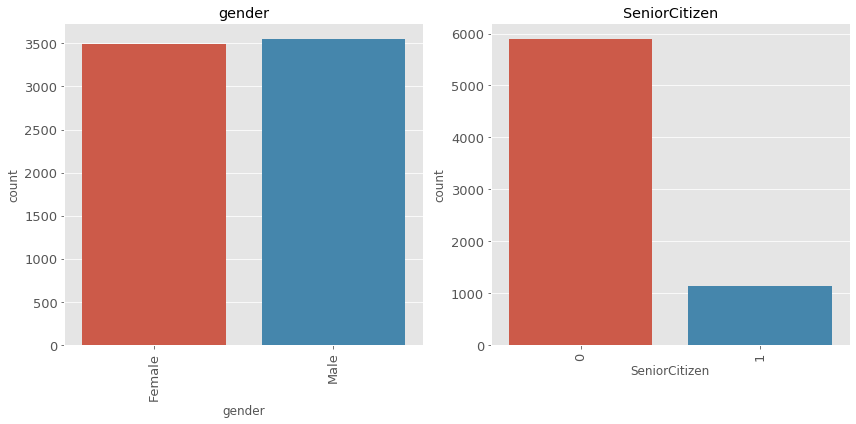

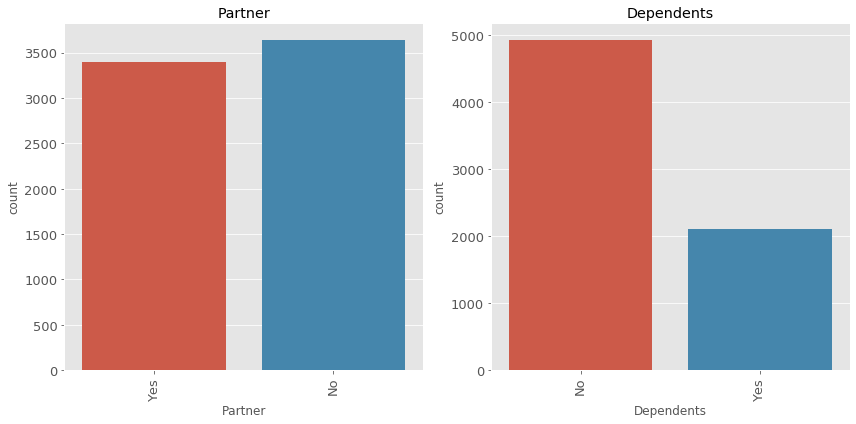

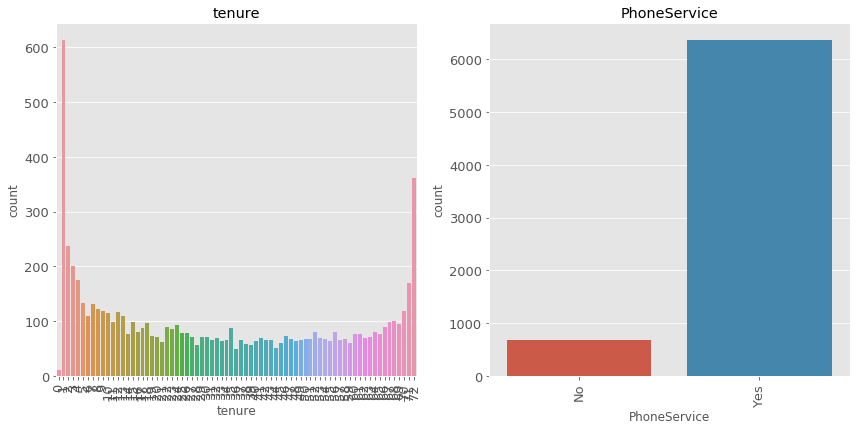

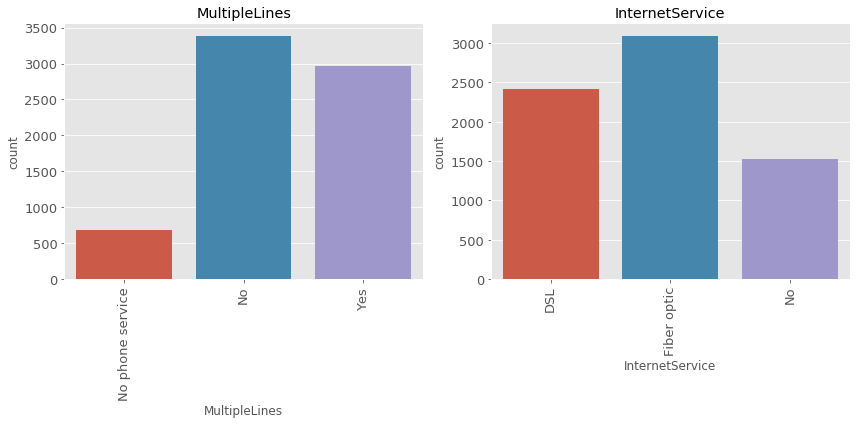

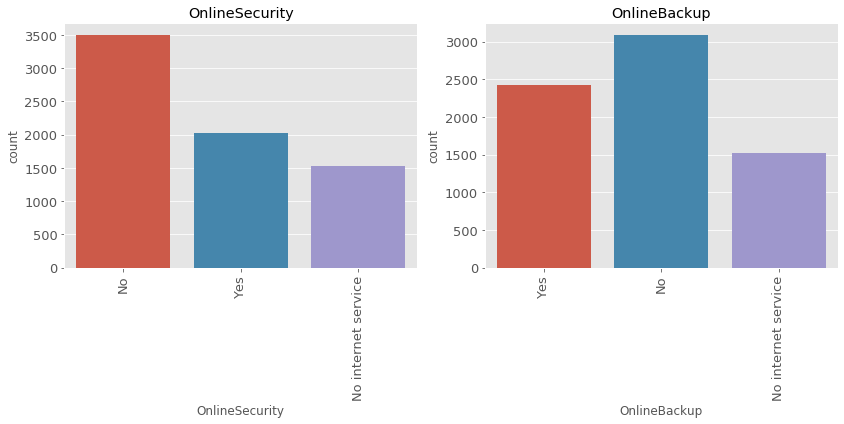

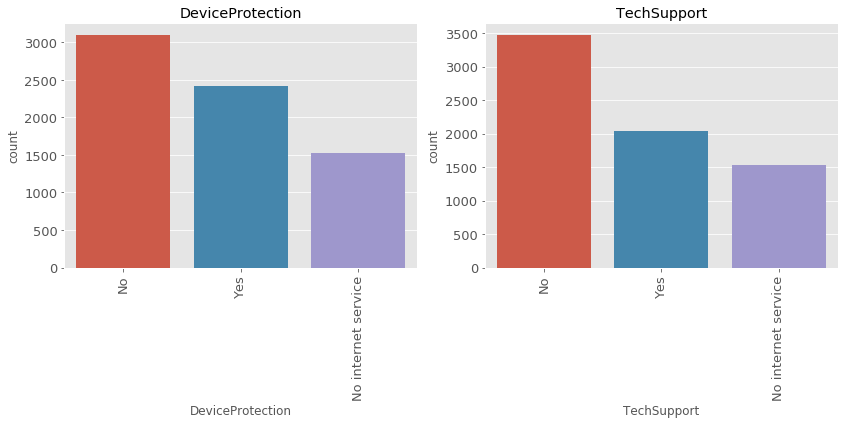

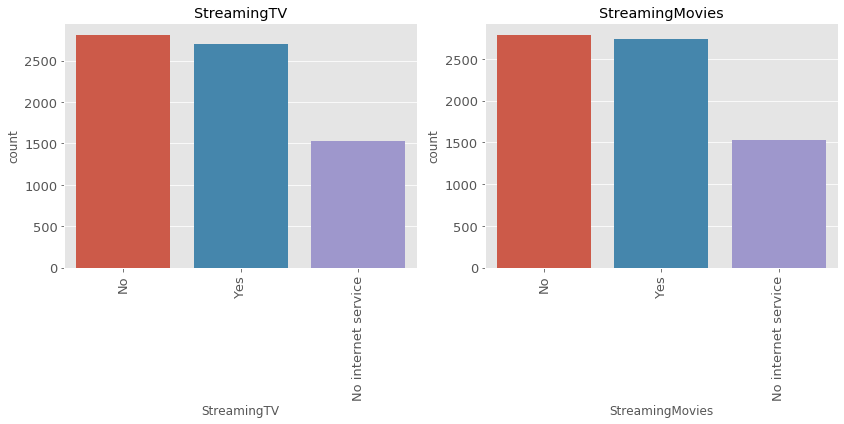

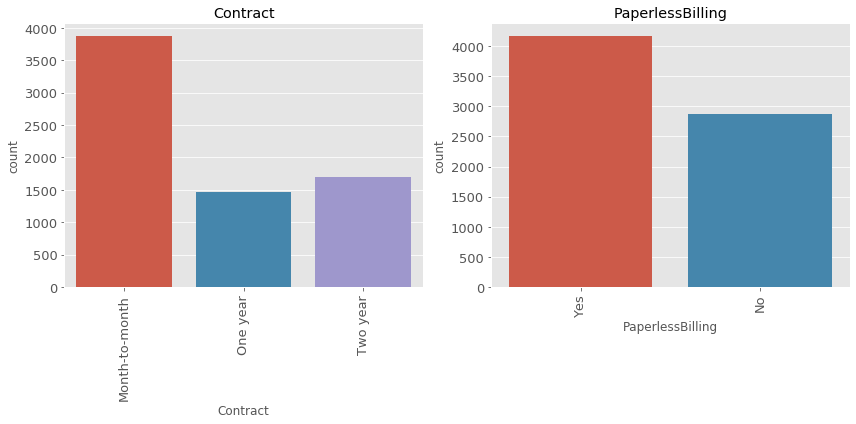

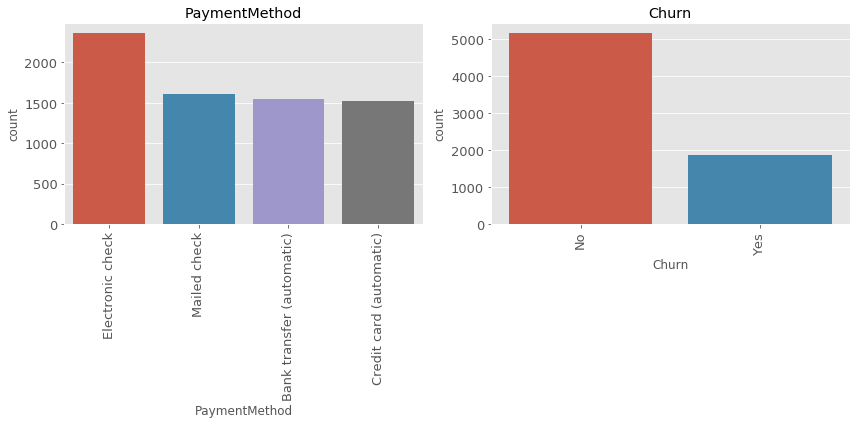

In [0]:
#univariate analysis
def plot_categorical_columns(df):
    categorical_columns = df.select_dtypes(include=['object','int']).columns
    
    for i in range(0,len(categorical_columns),2):
            if len(categorical_columns) > i+1:
                
                plt.figure(figsize=(12,6))
                plt.subplot(121)
                sns.countplot(df[categorical_columns[i]])
                plt.title(categorical_columns[i])
                plt.xticks(rotation=90)
                plt.subplot(122)     
                sns.countplot(df[categorical_columns[i+1]])
                plt.title(categorical_columns[i+1])
                plt.tight_layout()
                plt.xticks(rotation=90)
                plt.show()

            else:
                sns.countplot(df[categorical_columns[i+1]])
                plt.xticks(rotation=45)
                plt.title(categorical_columns[i])

plot = plot_categorical_columns(df)

**Observation :**

1. The number of male and female customers the telecom company is close to equal
2. The Senior Citizen Customer count is very low. Need to find out why ? There can be many reasons like poor service or not that familiar with the company
3. Many of them do not prefer to have multiple lines.
4. The customers who are having phone service of the telecom company is very high.
5. Most of the customers prefer Fiber optic internet service over DSL.
6. Not many people prefer to take online security service from company and the same goes for online backup service,TechSupport and Deviceprotection
7. The customer prefering for live streaming  is same as compared to the customer not preferring live streaming
8. Most of the people prefer month to month contract  over 1 or 2 year contract . The Telecom company must check why people are not opting for 2 or 2 year services.
9. Most of the people prefer paperless billing
10. Most of the people prefer electronic check for payment method
11. The Customer churn of this telecom company is very low 

### **Binning of tenure column**

---
In the above analysis you might have observed improper visualisation of tenure column since it was continous and a perfect way to visualize continous column is by performing binning of months by a technique called adaptive binning.


0.00    0.00
0.25    9.00
0.50   29.00
0.75   55.00
1.00   72.00
Name: tenure, dtype: float64

<Figure size 864x432 with 0 Axes>

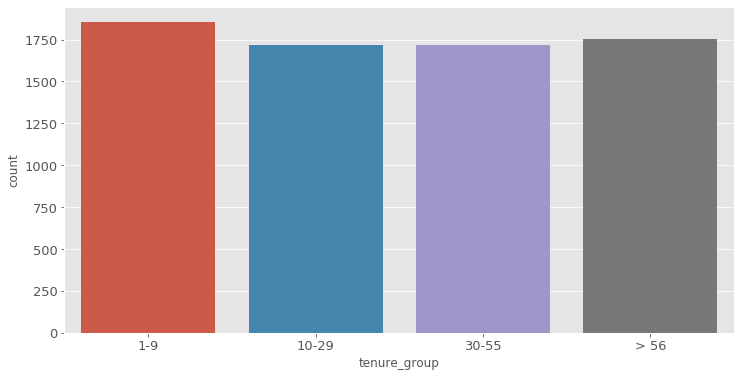

In [0]:
#Visualisation of Tenure
#Binning the tenure column so it becomes easy for visualisation

# Adaptive binning on 'tenure' using quantiles
quantile_list = [0, .25, .5, .75, 1.]
quantiles = df['tenure'].quantile(quantile_list)
quantiles
quantile_labels = ['1-9', '10-29', '30-55', '> 56']
df['tenure_group'] = pd.qcut(df['tenure'], q=quantile_list, labels=quantile_labels)
plt.figure(figsize=(12,6))
sns.countplot(df['tenure_group'])

### **Binning of Monthly charges column**

0.00    18.25
0.25    35.50
0.50    70.35
0.75    89.85
1.00   118.75
Name: MonthlyCharges, dtype: float64

<Figure size 864x432 with 0 Axes>

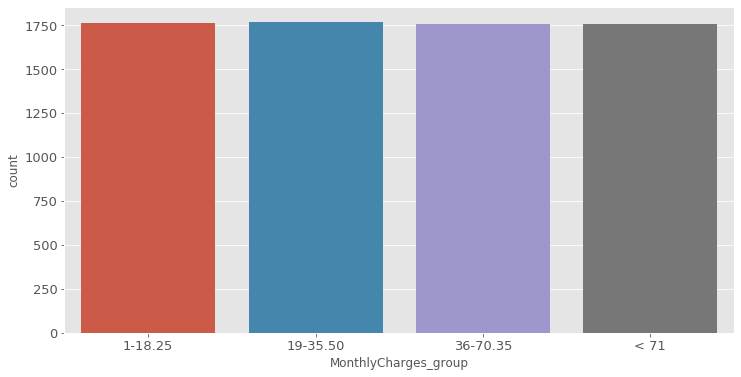

In [0]:
#Visualisation of monthly charges
quantile_list_1 = [0, .25, .5, .75, 1.]
quantiles_1 = df['MonthlyCharges'].quantile(quantile_list)
quantiles_1
quantile_labels_1 = ['1-18.25', '19-35.50', '36-70.35','< 71']
df['MonthlyCharges_group'] = pd.qcut(df['MonthlyCharges'], q=quantile_list_1, labels=quantile_labels_1)
plt.figure(figsize=(12,6))
sns.countplot(df['MonthlyCharges_group'])

### **Bivariate Analysis**

---
Bivariate analysis involves checking the relationship between two variables simultaneously. In the function below, we plot every categorical feature against the target by plotting a countplot.





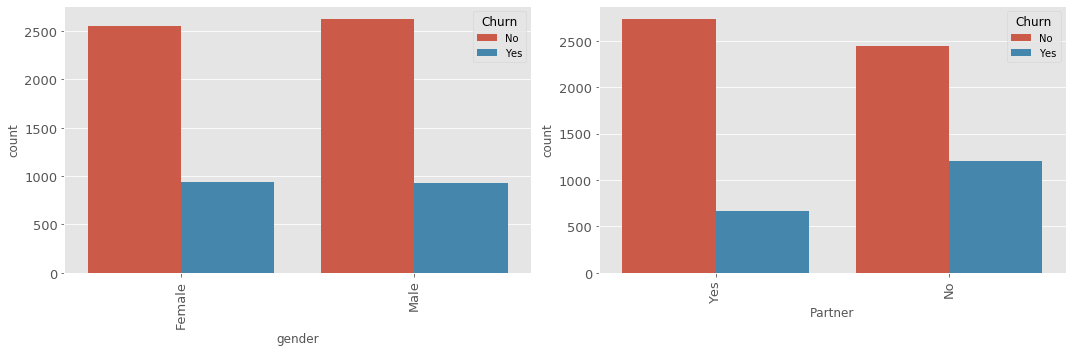

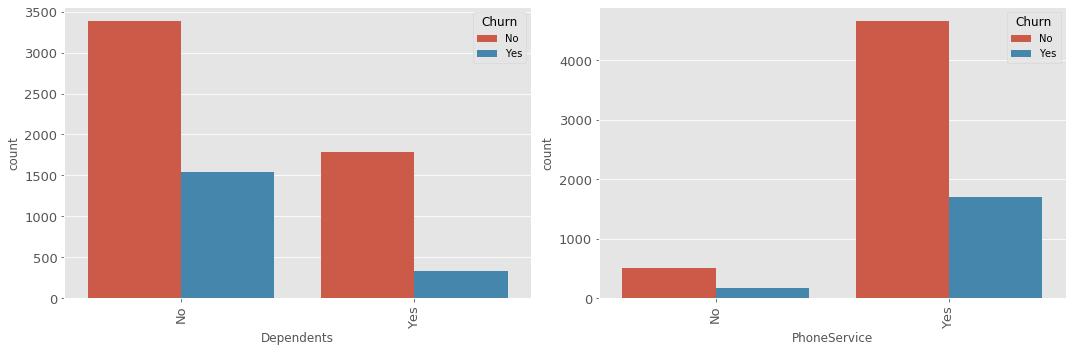

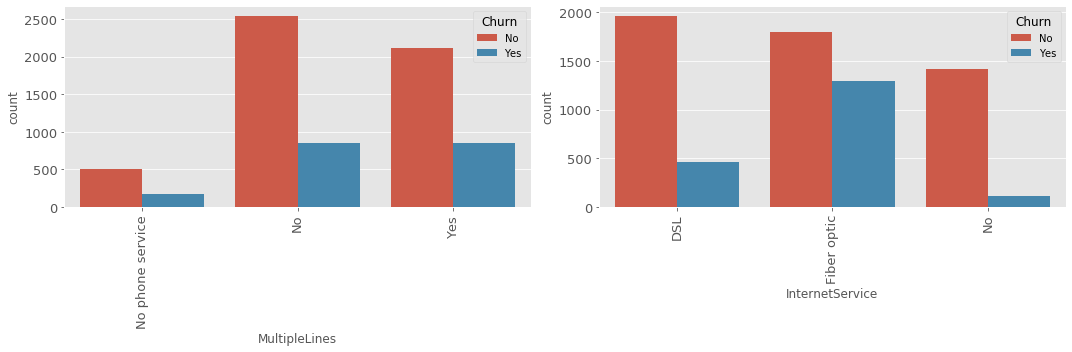

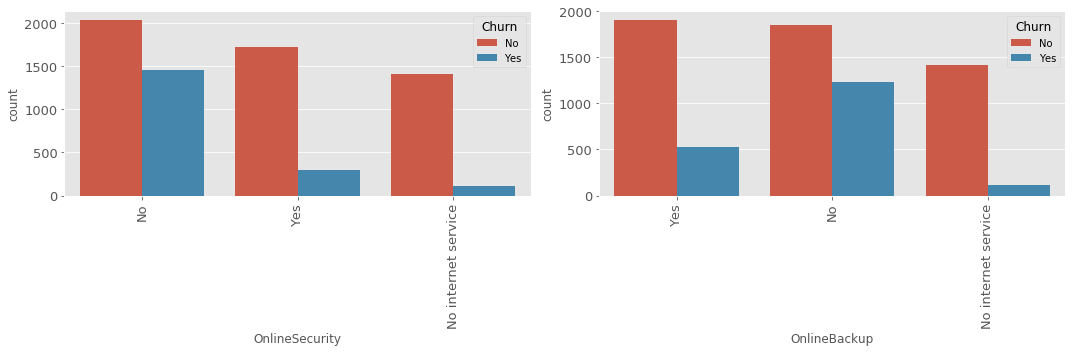

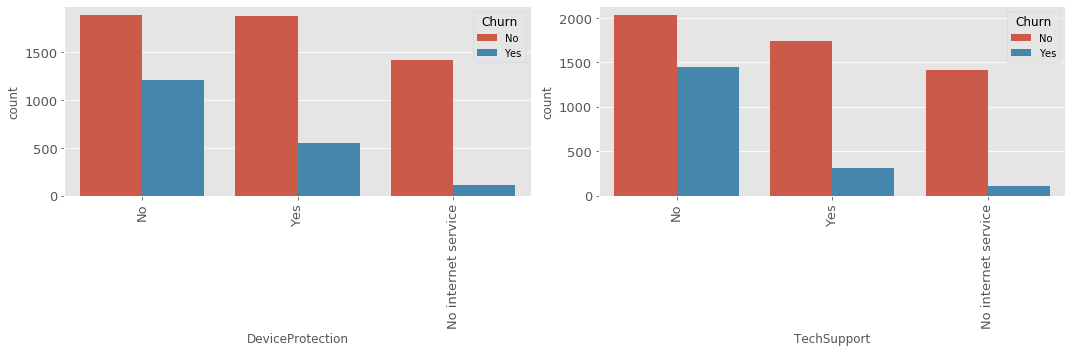

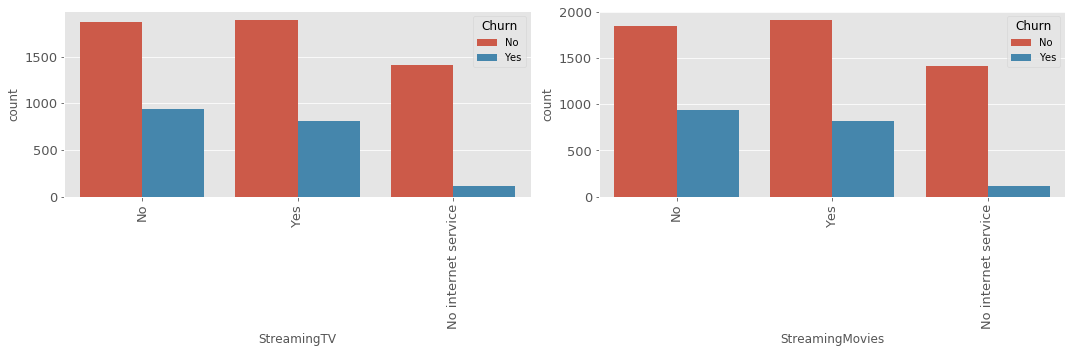

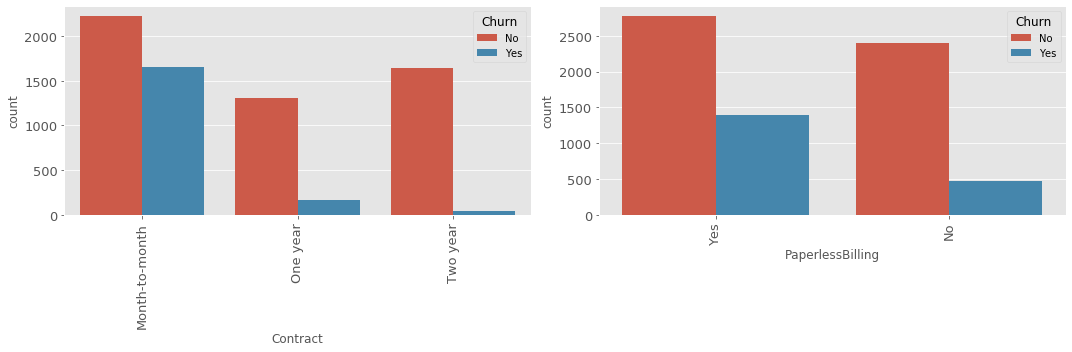

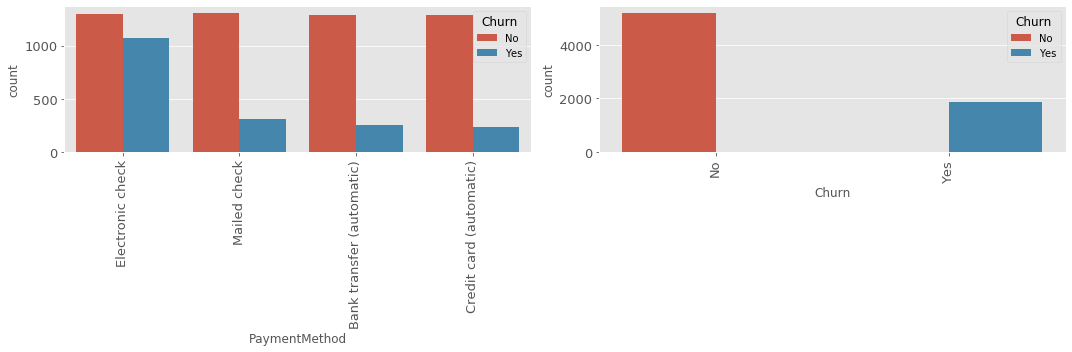

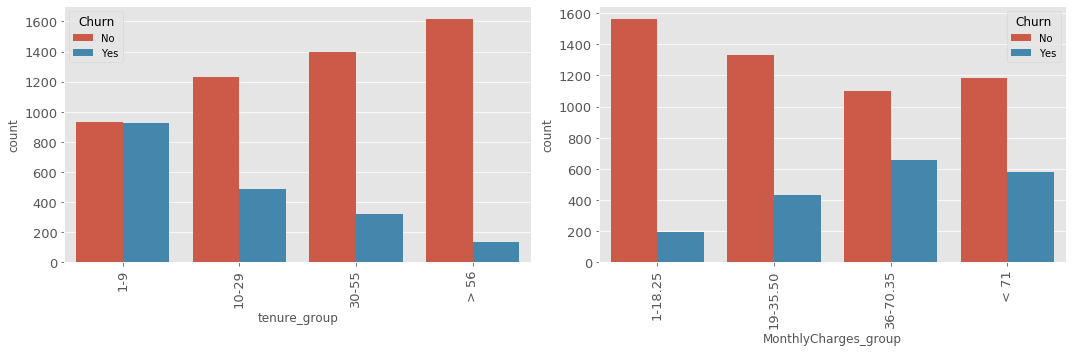

In [0]:
#Bivariate analysis of feature variable vs target variable
def bivariate_analysis_categorical(dataframe,target):
    categorical_columns = df.select_dtypes(exclude=np.number).columns
    for i in range(0,len(categorical_columns),2):
        if len(categorical_columns) > i+1:
            plt.figure(figsize=(15,5))
            plt.subplot(121)
            sns.countplot(x=df[categorical_columns[i]],hue=target,data=df)
            plt.xticks(rotation=90)
            plt.subplot(122)            
            sns.countplot(df[categorical_columns[i+1]],hue=target,data=df)
            plt.xticks(rotation=90)
            plt.tight_layout()
            plt.show()


bivariate_analysis_categorical(df,df['Churn'])

**Observations:**

1. In the above visualisation we can observe one thing in common that is the number of people opting for the telecom services is less than the number of people quitting the service of telecom company.This says that most of the people are not happy with the current services that is provided by the telecom company

2. The company has to focus on each and every service that they provide to customers . Because observe the contract visualisation very few customers are using the services of the company for a long time like for 1 year or two year . Most of them are opting for Monthly services and there also  the churn rate is very low

3. One more we can observe that the customers are not happy with the internet services. Most of who have opted for internet services with the company are quitting the service once their service period is over . The customers are not looking for renewal of  their services which is very bad

4. The tenure group visualisation shows an interesting fact that there is a steep rise in the people not show interest in the telecom company across all the groups.

5. Observe the monthly charges group you can see that most the customers are from the low cost group that are quitting from the service. This is same across all group. This says people are not happy with services that they are getting even after investing a fair amount of money.


## **Label Encoding**
Before applying our machine learning algorithm, we need to recollect that any algorithm can only read numerical values. It is therefore essential to encode categorical features into numerical values. Encoding of categorical variables can be performed in two ways:
For the given dataset, we are going to label encode the categorical columns.

what is label encoding ?
 1. While working with machine learning projects we usually  have to deal 
with datasets that contain labels in multiple columns.These labels can be in the form of string or integers.To make it understandable to the humans.The training data is often labeled with words.
 2. Label encoding generally deals with converting categorical columns to numerical column and machine readable form . It is an important step for structured dataset in Machine learning

 for example :
 Suppose we have a column Height in some dataset.

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Capture-190.png)

After applying label encoding, the Height column is converted into:

![alt text](https://media.geeksforgeeks.org/wp-content/uploads/Capture-191.png)

**image ref : geeks for geeks**

In the function below we will perform label encoding on all the categorical features and also the target (since it is categorical) in the dataset. 


In [0]:
#Label Encoding Function
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

df=MultiColumnLabelEncoder(columns = ['gender','Partner','Dependents','PhoneService','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
                                   'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod',
                                   'Churn']).fit_transform(df.head(5))
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group,MonthlyCharges_group
0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,29.85,29.85,0,1-9,1-18.25
1,1,0,0,0,34,1,0,0,1,0,1,0,0,0,1,0,2,56.95,1889.50,0,30-55,19-35.50
2,1,0,0,0,2,1,0,0,1,1,0,0,0,0,0,1,2,53.85,108.15,1,1-9,19-35.50
3,1,0,0,0,45,0,1,0,1,0,1,1,0,0,1,0,0,42.30,1840.75,0,30-55,19-35.50
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,1,70.70,151.65,1,1-9,36-70.35


**NOTE :**
1. I have performed label encoding on all categorical columns by applying the function of MultiplecolumnLabelencoder.
2. Legend for each column as follows:
* gender =       0-Female, 1-Male
* SeniorCitizen= 0-No, 1- Yes
* Partner=       0-No , 1-Yes
* Dependents=    0-No, 1-Yes
* PhoneService=  0-No, 1-Yes
* MultipleLines= 1-No phone service, 0-No , 2-Yes
* InternetService= 0 - DSL ,1-Fiberoptic , 2-No
* OnlineSecurity = 0-No,1-No internet service,2-Yes
* OnlineBackup   = 0 -yes , 1- No service ,2- No
* DeviceProtection = 0 - No,1-No internet service ,2-Yes
* TechSupport = 0 - No , 1 -1-No phone service ,2-Yes
* StreamingTV	= 0 - No , 1 -1-No Internet service ,2-Yes
* Contract	=   0 - Monthly , 1 - 1 year service ,2- 2 year
* PaperlessBilling = 0-No , 1-Yes
* PaymentMethod	= 0-Bank Transfer,2- Electroniccheck ,3-Mailed check ,4-Credit card
* churn - 1- customer retained , 0- customer not retained

## **Check Data ImBalance**
Class imbalance occurs when the observations belonging to one class in the target are significantly higher than the other class or classes. A class distribution of 80:20 or greater is typically considered as an imbalance for a binary classification.

Since most machine learning algorithms assume that data is equally distributed, applying them on imbalanced data often results in bias towards majority classes and poor classification of minority classes. Hence we need to identify & deal with class imbalance.

Let's write a function below that takes the target variable and outputs the distribution of classes in the target.

![alt text](https://www.nexsoftsys.com/articles/images/imbalanced-data.jpg)

In [0]:
#Check Data Imbalance
def class_imbalance(target):
    class_values = (target.value_counts()/target.value_counts().sum())*100
    return class_values

class_imbalance(df['Churn'])

0   60.00
1   40.00
Name: Churn, dtype: float64

After observing the data imbalance test result we come to conclusion that the target variable is not imbalanced for one particular class since the distribution is 60:40 it is considerable.

But if you face any data imbalance problem there are various sampling techniques to solve this kind of problems like 
1. Random undersampling
2. Random oversampling
3. cluster Centroids
4. Tomek Undersamping
5. SMOTE (Synthetic Minority Oversampling Technique)


## **Creating a DataFrame**

---
It is always a good habit to keep a training dataframe and your original dataframe different so that any changes or transformation you make on train dataframe does not affect the original data frame.


In [0]:
train_data=df[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']]
train_data.head(5)
train_data.info()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,29.85,29.85,0
1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,2,56.95,1889.50,0
2,1,0,0,0,1,0,0,1,1,0,0,0,0,1,2,53.85,108.15,1
3,1,0,0,0,0,1,0,1,0,1,1,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,70.70,151.65,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 18 columns):
gender              5 non-null int64
SeniorCitizen       5 non-null int64
Partner             5 non-null int64
Dependents          5 non-null int64
PhoneService        5 non-null int64
MultipleLines       5 non-null int64
InternetService     5 non-null int64
OnlineSecurity      5 non-null int64
OnlineBackup        5 non-null int64
DeviceProtection    5 non-null int64
TechSupport         5 non-null int64
StreamingTV         5 non-null int64
Contract            5 non-null int64
PaperlessBilling    5 non-null int64
PaymentMethod       5 non-null int64
MonthlyCharges      5 non-null float64
TotalCharges        5 non-null float64
Churn               5 non-null int64
dtypes: float64(2), int64(16)
memory usage: 848.0 bytes


## **Logistic Regression**

---
**What is Classification ?**

* Classification is a central topic in machine learning that has to do with teaching machines how to group together data by particular criteria. It is different from regression in the sense that target variables in classification are discrete in nature while in regression they are continuous. Remember that both regression and classification fall into the category of supervised learning approaches.There is an also an unsupervised version of the classification, called clustering where computers find shared characteristics by which to group data when categories are not specified.

**Examples of classification**

![alt text](https://i0.wp.com/dataaspirant.com/wp-content/uploads/2016/04/logisticregression.png?resize=690%2C345)

**What is the difference between linear regression and logistic regression?**

* Outcome: This is the fundamental and possibly the most intuitive difference between both the algorithms. In linear regression, the outcome (dependent variable) is continuous. It can have any one of an infinite number of possible values, for instance, weight, height, number of hours, etc. Whereas in logistic regression, the outcome (dependent variable) has only a limited number of possible values. For instance, yes/no, true/false,red/green/blue, 1st/2nd/3rd/4th, etc.

* Linear regression output as probabilities: It's tempting to use the linear regression output as probabilities but it's a mistake because the output can be negative, and greater than 1 whereas probability can not. As regression might actually produce probabilities that could be less than 0, or even bigger than 1, logistic regression was introduced.

* Upon addition of outliers, the best-fit line changes which in turn changes the threshold for the decision boundary.

* Linear combination of features spans from negative infinity to Positive infinity. But for a classification (binary) one you can have only two possible values


**Sigmoid Function**

We can overcome the issues of classification  with the help of the sigmoid function, also known as the S-curve. It looks somewhat like this:

   ![alt text](https://machinelearningblogcom.files.wordpress.com/2017/11/bildschirmfoto-2017-11-10-um-12-20-14.png?w=300&h=237)

In the figure, we consider negative labels as having the value 0 while the positive ones as being 1s.

* **Types of Logistic Regression**
1. Binary Logistic Regression
The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression
Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression
Three or more categories with ordering. Example: Movie rating from 1 to 5

Our project is example of  binary logistic regression

* **Decision Boundary**

To predict which class a data belongs, a threshold can be set. Based upon this threshold, the obtained estimated probability is classified into classes.
Say, if predicted_value ≥ 0.5, then classify as customer will churn or predict as customer will not churn
The decision boundary is robust enough to deal with outliers.

![alt text](https://storage.googleapis.com/ga-commit-live-prod-live-data/account/b92/11111111-1111-1111-1111-000000000000/b-624/f82fb6a7-4eee-46f0-840b-1830a8752370/file.png)

Refer the link below for better intuiton of Logistic Regression

* [link text](https://youtu.be/yIYKR4sgzI8)

For Mathematical intuition visit the link below

* video 1 - [link text](https://youtu.be/vN5cNN2-HWE)
* video 2 - [link text](https://youtu.be/BfKanl1aSG0)





Lets begin with model building !!

I will be using the library shown below for implementing the logistic regression.

**step 1** :The code shown in the cell below i am trying to create a dataframe of features on which i am going to build the logistic model.



In [0]:
train_model=train_data[['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup',
               'DeviceProtection','TechSupport','StreamingTV','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges','Churn']]

**step 2:**
 Splitting the data into train and test using the sklearn library.


```
from sklearn.model_selection import train_test_split
```



In [0]:
X=train_model.drop('Churn',1)
y=train_model['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

**step 3:**Building the Logistic model using sklearn library The library shown below


```
from sklearn.linear_model import LogisticRegression
```



In [0]:
#Applying Logistic Regression on above model
from sklearn.linear_model import LogisticRegression
X=train_model.drop('Churn',1)
y=train_model['Churn']
clf=LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**step 4 :** **Evaluation Metric**
* Confusion Matrix

Also called the error matrix, it is a table describing the performance of a supervised machine learning model on the testing data, where the true values are unknown. Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (and vice versa).

![alt text](https://storage.googleapis.com/ga-commit-live-stag-uat-data/account/b92/11111111-1111-1111-1111-000000000000/b376/03808ceb-2a3a-4828-9f7d-bdbe7a00c6a1/file.jpg)

Before going through the calculations, let's understand some terms:

* True Positives (TP): Actually positive and predicted positive (CORRECT PREDICTIONS)
* True Negatives (TN): Actually negative and predicted negative (CORRECT PREDICTIONS)
* False Positives (FP): Actually negative but predicted positive (INCORRECT PREDICTIONS)
* False Negatives (FN): Actually positive but predicted negative (INCORRECT PREDICTIONS)

In the above example with the binary outcome Cat($1$) or Non-cat($0$):
* Actual number of cats = 8
* Actual number of non-cats = 19

Now, from the predictions based on model,

* Predicted cats = 5 + 2 = 75+2=7
* Predicted non-cats = 3 + 17 = 203+17=20

So,

* TP = 5 i.e. actual cats and also predicted cats.

* FP = 2 i.e. actual non-cats but predicted cats.

* FN = 3 i.e. actual cats but predicted non-cats.

* TN = 17 i.e. actual non-cats and predicted non-cats.

we will be using a sklearn library to implement confusion matrix



```
from sklearn.metrics import confusion_matrix
```





In [0]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_pred,y_test)
print('confusion matrby ix:',cf)

confusion matrix: [[1 0]
 [0 1]]


* Accuracy Score - It generally provides overall accuracy of model. The value generally ranges from 0 to 1

In [0]:
#Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)
print('accuracy:',acc)

accuracy: 1.0


* **Recall Score**

For every actual class, it is the fraction of the number of correct predictions to the total number of actual instances of the class. It answers the question Of all the instances of the class "X", what percentage did we predict correctly? Mathematically,

**Recall(R)= TP/TP+FN**

**When to use recall?**

Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative. For instance, in fraud detection or sick patient detection; if a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.

python implementation of recall
​	

In [0]:
#Recall 
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
print('recall:',recall)

recall: 1.0


* **Precision Score**

Precision For every predicted class, it is the fraction of the correct predictions to the total number of predictions for that class. It answers the question Of all the values predicted as belonging to the class "X", what percentage is correct? Mathematically,

**Precision(P) = TP/TP+FP**

**When to use precision?**

Precision is a good measure to determine when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

In [0]:
#Precision Score
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred)
print('precision:',precision)

precision: 1.0


**F1 Score:**

It is the harmonic mean of the precision and recall for a classifier. Mathematically,
**F score= 2PR/P+R**
P stands for precison
R stands for Recall

**When to use F1 score?**

If you want to achieve a balance between precision and recall, use the F-1 score. But unfortunately, the F-score isn’t the holy grail and has its tradeoffs. It favours classifiers that have similar precision and recall. This is a problem because you sometimes want a high precision and sometimes a high recall. The thing is that increasing precision results in a decreasing recall and vice versa. This is called the precision/recall tradeoff.

​	

In [0]:
#f1 score
from sklearn.metrics import f1_score
f_score = f1_score(y_pred,y_test)
print('f1_score:',f_score)

f1_score: 1.0


In [0]:
#Classification Report
from sklearn.metrics import classification_report
class_report=classification_report(y_test,y_pred)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



lets reduce the feature size and see what results do i get.

In [0]:
train_model=train_data[['MonthlyCharges','TotalCharges','Churn']]
X=train_model.drop('Churn',1)
y=train_model['Churn']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
clf=LogisticRegression(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_pred,y_test)
print('confusion matrix:',cf)
print('=='*100)
#Accuracy Score
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_pred,y_test)
print('accuracy:',acc)
print('=='*100)
#f1 score
from sklearn.metrics import f1_score
f_score = f1_score(y_pred,y_test)
print('f1_score:',f_score)
print('=='*100)
#Recall 
from sklearn.metrics import recall_score
recall = recall_score(y_test,y_pred)
print('recall:',recall)
print('=='*100)
#Classification Report
from sklearn.metrics import classification_report
class_report=classification_report(y_test,y_pred)
print(class_report)
print('=='*100)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

confusion matrix: [[1 0]
 [0 1]]
accuracy: 1.0
f1_score: 1.0
recall: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



Even after reducing the feature space i am getting the same accuracy . This generally happens when your model does complete linear separation to some features and the models predictive power is relied on those two features such kind of situation called quasi complete separation.

**What is quasi complete separation ?**

A complete separation happens when the outcome variable separates a predictor variable or a combination of predictor variables completely. 
Albert and Anderson (1984) define this as, “there is a vector α that correctly allocates all observations to their group.” Below is a small example.
* | Y | X1 | X2|

* 0   | 1  | 3
* 0   | 2  | 2
* 0   |  3 |-1
* 0   | 3  |-1
* 1   |  5 | 2
* 1   |  6 | 4
* 1   | 10 | 1
* 1   | 11 | 0 

In this example, Y is the outcome variable, X1 and X2 are predictor variables. We can see that observations with Y = 0 all have values of X1<=3 and observations with Y = 1 all have values of X1>3. In other words, Y separates X1 perfectly. The other way to see it is that X1 predicts Y perfectly since X1<=3 corresponds to Y = 0 and X1 > 3 corresponds to Y = 1. By chance, we have found a perfect predictor X1 for the outcome variable Y. In terms of predicted probabilities, we have Prob(Y = 1 | X1<=3) = 0 and Prob(Y=1 X1>3) = 1, without the need for estimating a model.

Complete separation or perfect prediction can occur for several reasons.
* One common example is when using several categorical variables whose categories are coded by indicators.For example, if one is studying an age-related disease (present/absent) and age is one of the predictors, there may be subgroups (e.g., women over 55) all of whom have the disease.

* Complete separation also may occur if there is a coding error or you mistakingly included another version of the outcome as a predictor.For example, we might have dichotomized a continuous variable X into a binary variable Y. We then wanted to study the relationship between Y and some predictor variables. If we would include X as a predictor variable, we would run into the problem of perfect prediction, since by definition, Y separates X completely. 

* The other possible scenario for complete separation to happen is when the sample size is very small. In our example data above, there is no reason for why Y has to be 0 when X1 is <=3. If the sample were large enough, we would probably have some observations with Y = 1 and X1 <=3, breaking up the complete separation of X1.


## **Conclusion :**

* The model i have built is a ML model but it is behaving more like a rule based model due to quasi complete separation Since just looking at the results of two features i can figure out wheather the customer is going to churn or not. 

* Hence to improve the churn rate i suggest the telecom company to first take a proper feedback from customers regarding the services provided by the company. And based on the results i have presented i suggest the telecom company  to make some changes in the charges on all the services or create special value packs to attract the customer to increase the churn rate
